# A Comparative Analysis of KMeans, DBSCAN and Agglomerative Hierarchical Clustering Techniques in Customer Personality Segmentation

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
pd.set_option('display.max_columns',40)



In [2]:
#importing data
data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# viewing descriptive data
desc = pd.DataFrame(index=list(data))
desc['count'] = data.count()
desc['nunique'] = data.nunique()
desc['%unique'] = data.nunique() / len(data) * 100
desc['null'] = data.isnull().sum()
desc['type'] = data.dtypes
desc = pd.concat([desc, data.describe().T.drop('count', axis=1)], axis=1)
desc

,count,nunique,%unique,null,type,mean,std,min,25%,50%,75%,max
ID,2240,2240,100.000000,0,int64,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240,59,2.633929,0,int64,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Education,2240,5,0.223214,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,0.357143,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216,1974,88.125000,24,float64,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240,3,0.133929,0,int64,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240,3,0.133929,0,int64,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Dt_Customer,2240,663,29.598214,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240,100,4.464286,0,int64,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240,776,34.642857,0,int64,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


## Preprocessing

In [7]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [8]:
data = data.dropna()

In [9]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format = '%d-%m-%Y')

dates = []

for i in data['Dt_Customer']:
    dates.append(i)

# dates od the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [11]:
# Convertendo para datetime
dates = pd.to_datetime(dates, format='%d-%m-%Y')

# Calculando o número de dias desde o cliente mais recente
max_date = max(dates)
data['Customer_For'] = [(max_date - date).days for date in dates]

# Garantindo que a coluna "Customer_For" contenha valores numéricos
data["Customer_For"] = pd.to_numeric(data['Customer_For'], errors='coerce')


In [12]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,161


## Creating new columns

In [13]:
data["Age"] = 2024-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
data = data.drop(to_drop, axis=1)


In [14]:
data.head()

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,67,1617,Alone,0,1,0
1,2174,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,70,27,Alone,2,3,1
2,4141,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,59,776,Partner,0,2,0
3,6182,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,40,53,Partner,1,3,1
4,5324,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,43,422,Partner,1,3,1


In [15]:


#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]



In [16]:
data.head()

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,5524,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,663,67,1617,Alone,0,1,0
1,2174,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,113,70,27,Alone,2,3,1
2,4141,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,312,59,776,Partner,0,2,0
3,6182,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,139,40,53,Partner,1,3,1
4,5324,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,161,43,422,Partner,1,3,1


In [17]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


### categorical variables to numeric

In [18]:
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)



### Correlation Matrix

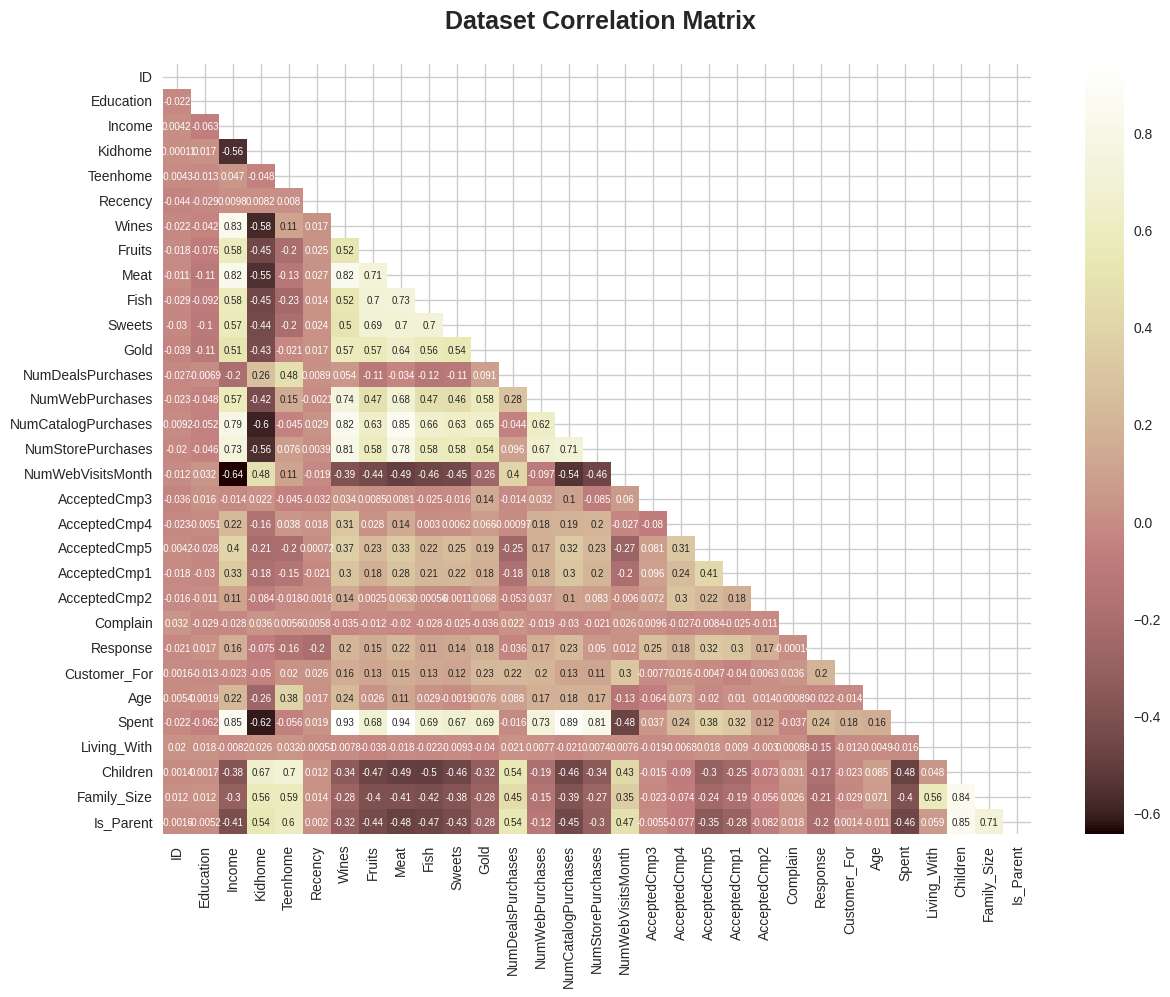

In [19]:
def heatmap(dataset, label = None):
    corr = dataset.corr(method = 'spearman')
    plt.figure(figsize = (14, 10), dpi = 100)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'pink', annot = True, annot_kws = {'size' : 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 18, weight = 'bold')
    plt.show()
heatmap(data, '')



In [20]:


ds = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

### Normalizing

In [21]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


Redução de dimensionalidade

In [22]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds))
PCA_ds.describe().T



,count,mean,std,min,25%,50%,75%,max
0,2212.0,-7.709324e-17,2.878610,-5.981314,-2.540562,-0.782425,2.386105,7.452993
1,2212.0,3.854662e-17,1.709592,-4.206164,-1.329241,-0.168711,1.223502,6.166094
2,2212.0,1.967484e-17,1.232363,-3.700510,-0.854499,-0.056861,0.856897,6.634823


In [23]:


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.34511035, 0.46683467, 0.53008453])

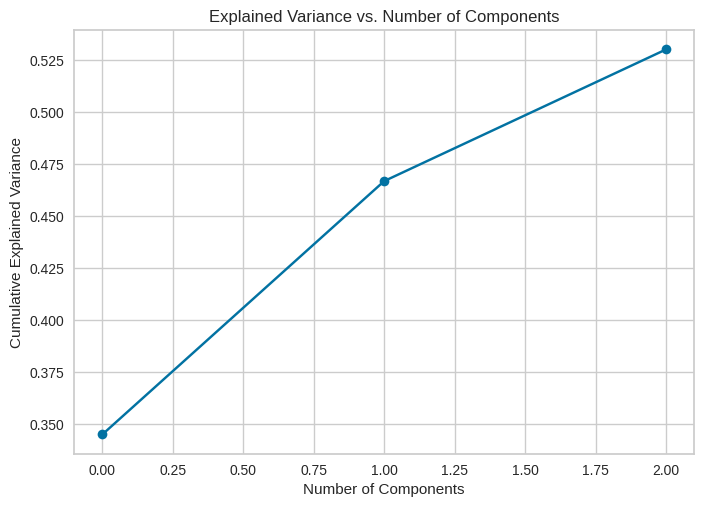

In [24]:
# Plot cumulative explained variance
plt.plot(cumulative_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [25]:
PCA_ds.head()

,0,1,2
0,4.986396,-0.160283,2.440575
1,-2.871576,0.037913,-1.461896
2,2.616826,-0.725289,-0.241184
3,-2.655056,-1.458840,-0.414170
4,-0.655778,0.180003,-0.135281


### Elbow Method

Elbow Method to determine the number of clusters to be formed:


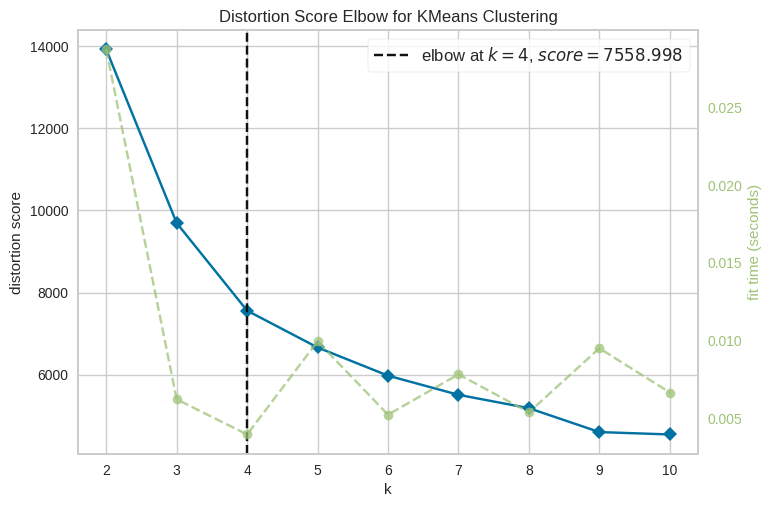

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### Clustering

In [27]:
from sklearn.cluster import (
    KMeans, AgglomerativeClustering, DBSCAN
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [28]:
# Note: K-Means is a popular centroid-based clustering algorithm.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_ds)
kmeans_score = silhouette_score(PCA_ds, kmeans_labels)

# Note: Agglomerative Clustering is a hierarchical clustering algorithm using Ward linkage.
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(PCA_ds)
agglomerative_score = silhouette_score(PCA_ds, agglomerative_labels)

# Note: DBSCAN is a density-based clustering algorithm.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(PCA_ds)
dbscan_score = silhouette_score(PCA_ds, dbscan_labels)

In [29]:
print("K-Means Silhouette Score:", kmeans_score)
print("Agglomerative Silhouette Score:", agglomerative_score)
print("DBSCAN Silhouette Score:", dbscan_score)

K-Means Silhouette Score: 0.373166563702933
Agglomerative Silhouette Score: 0.33514507008029804
DBSCAN Silhouette Score: -0.29801645308160846


In [30]:
PCA_ds["Clusters_KMeans"] = kmeans_labels
#Adding the Clusters feature to the orignal dataframe.
data["Clusters_KMeans"]= kmeans_labels


PCA_ds["Clusters_Agglo"] = agglomerative_labels
#Adding the Clusters feature to the orignal dataframe.
data["Clusters_Agglo"]= agglomerative_labels


PCA_ds["Clusters_DBSCAN"] = dbscan_labels
#Adding the Clusters feature to the orignal dataframe.
data["Clusters_DBSCAN"]= dbscan_labels



### Visualization

In [31]:
import plotly.graph_objects as go
pastel_palette = ["#ffa4c4", "#bc5eba", "#9de1b3", "#88f0ec"]

x = PCA_ds[0]
y = PCA_ds[1]
z = PCA_ds[2]
c = PCA_ds['Clusters_KMeans']
fig = go.Figure()
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=c,
        colorscale=pastel_palette,
        opacity=0.8
    ),
    name='Data Points'
)
fig.add_trace(scatter)
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    title='3D Scatter Plot of PCA-transformed Data'
)
fig.show()

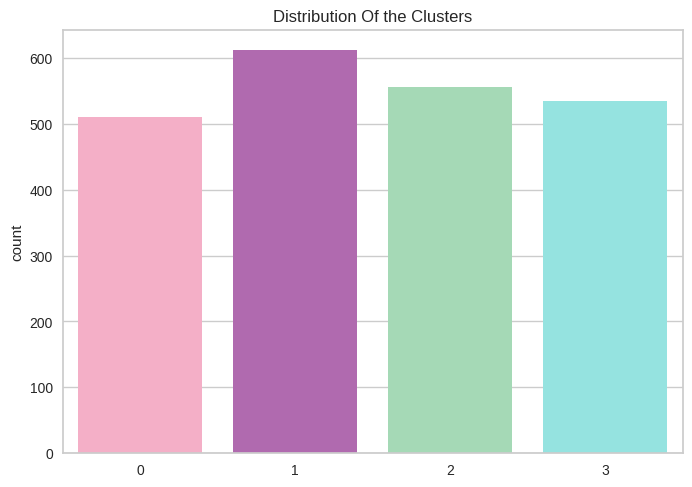

In [32]:
#pastel_palette = ["#ffa4c4", "#bc5eba", "#bcffd1", "#88f0ec"]

pl = sns.countplot(x=kmeans_labels, palette=pastel_palette)
pl.set_title("Distribution Of the Clusters")

plt.show()

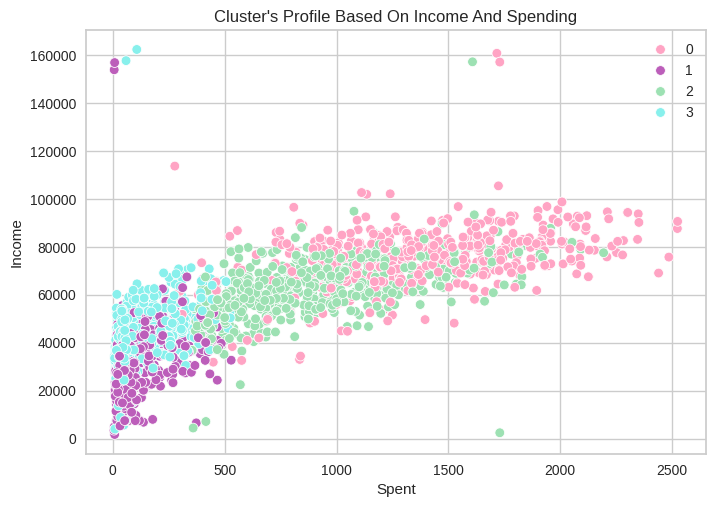

In [33]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_KMeans"],palette= pastel_palette)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Como o kmeans teve um resultado melhor vamos analisar por ele

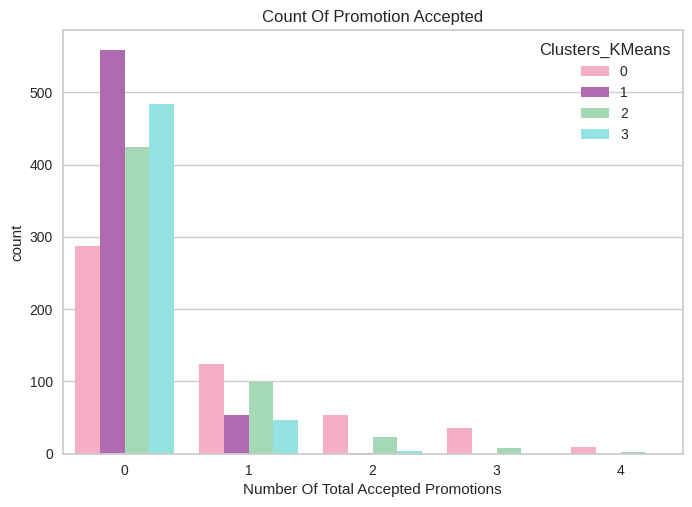

In [36]:


data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters_KMeans"], palette= pastel_palette)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()



<Figure size 800x550 with 0 Axes>

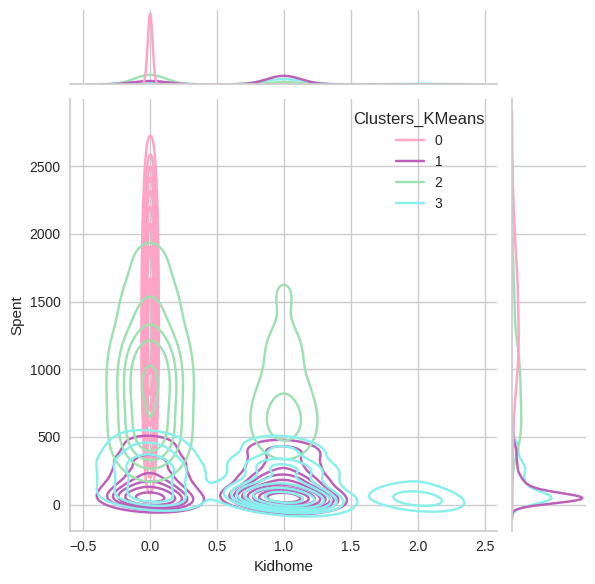

<Figure size 800x550 with 0 Axes>

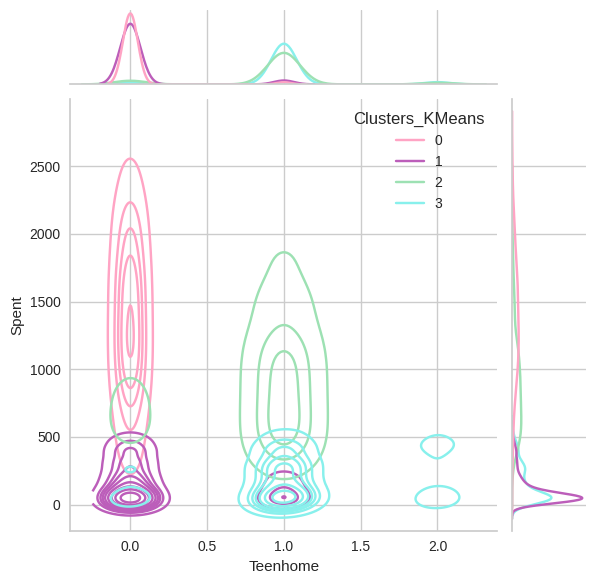

<Figure size 800x550 with 0 Axes>

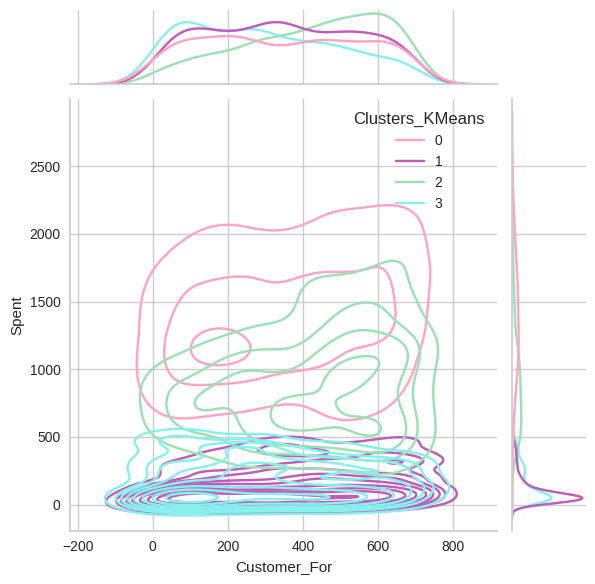

<Figure size 800x550 with 0 Axes>

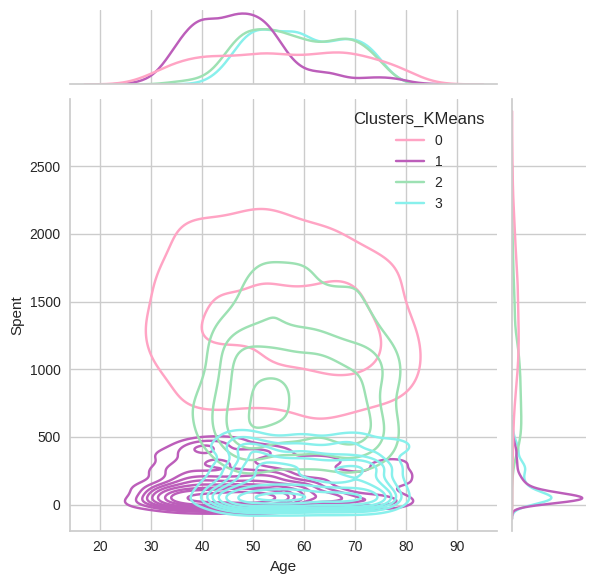

<Figure size 800x550 with 0 Axes>

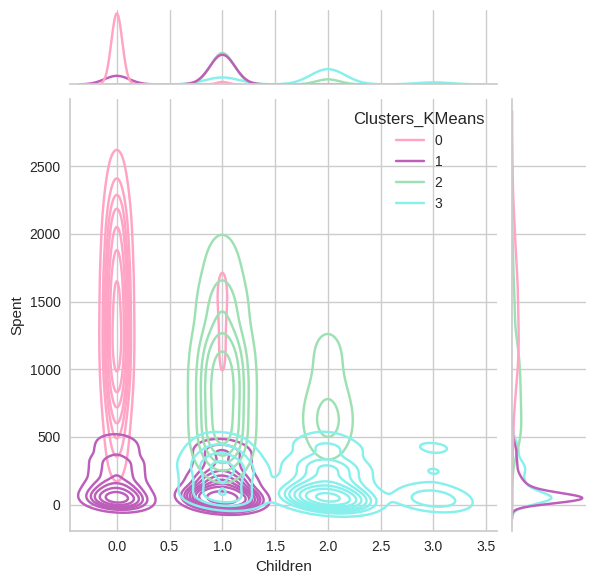

<Figure size 800x550 with 0 Axes>

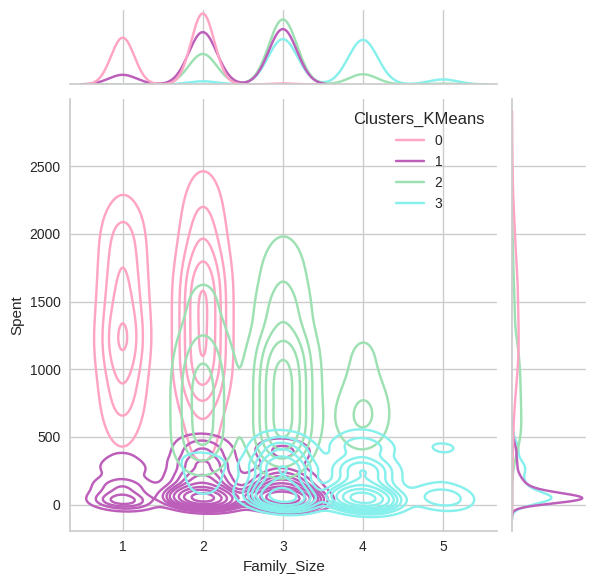

<Figure size 800x550 with 0 Axes>

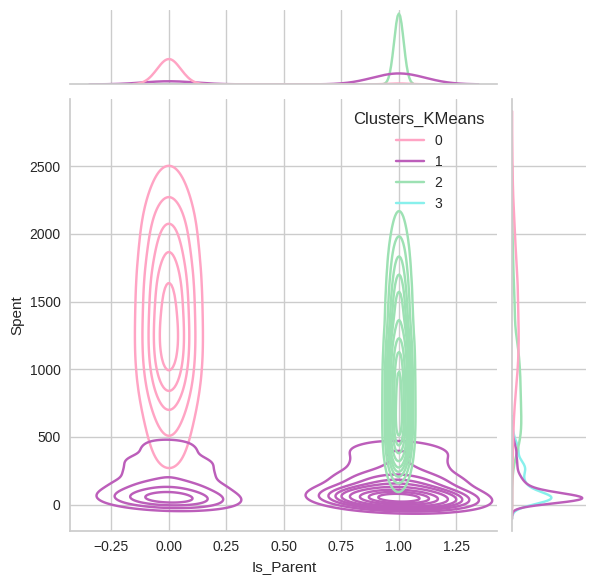

<Figure size 800x550 with 0 Axes>

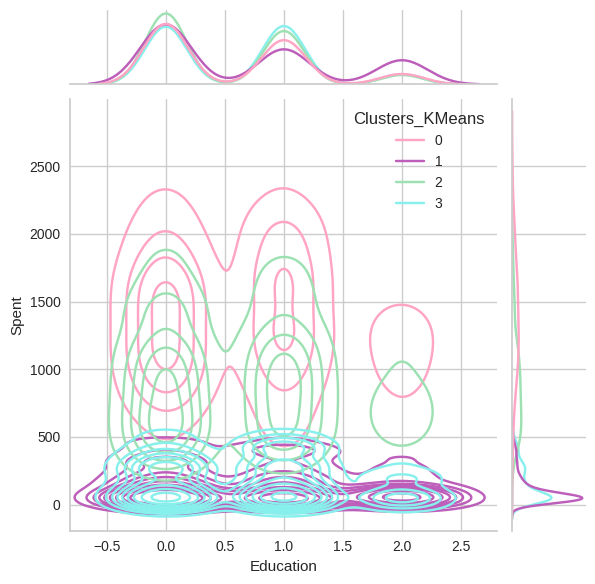

<Figure size 800x550 with 0 Axes>

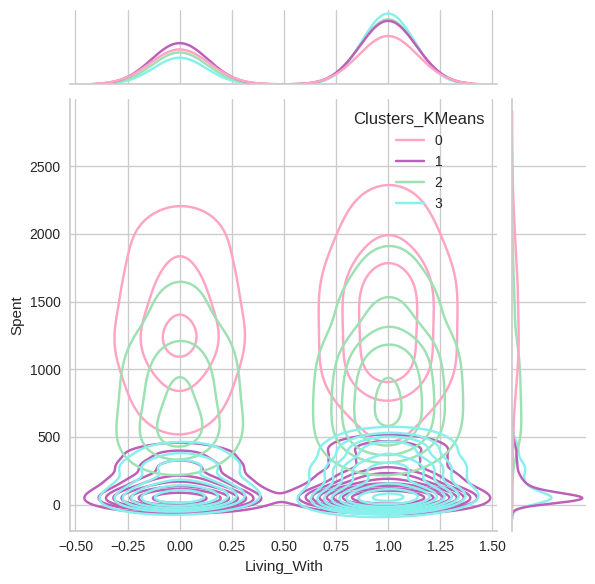

<Figure size 800x550 with 0 Axes>

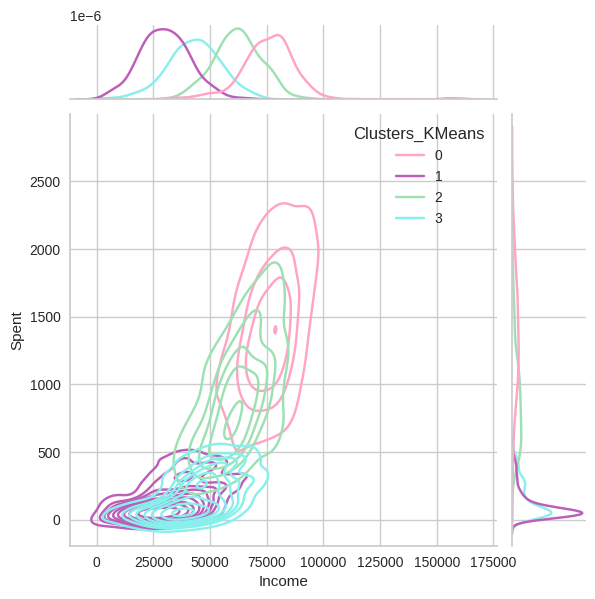

In [37]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With","Income"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters_KMeans"], kind="kde", palette=pastel_palette)
    plt.show()

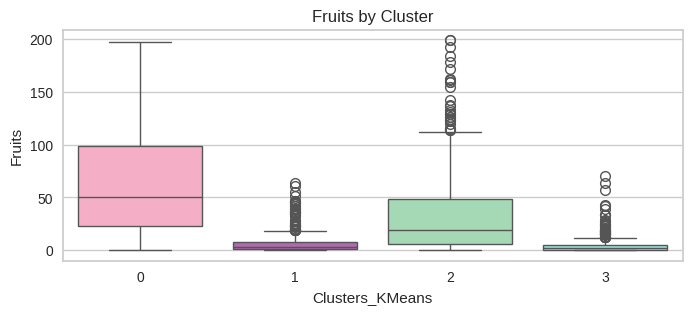

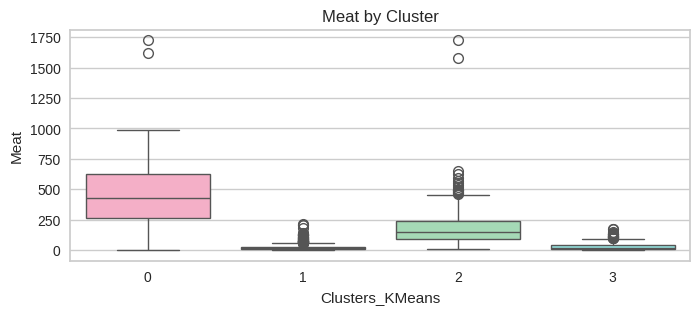

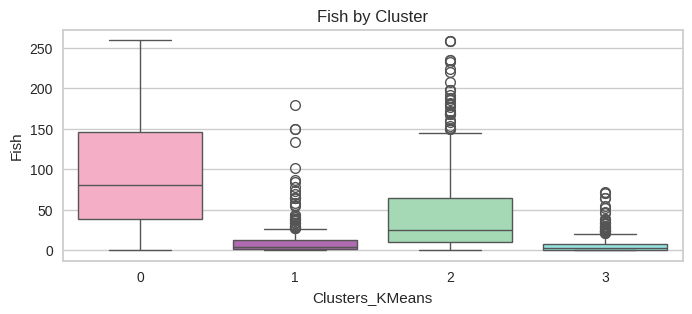

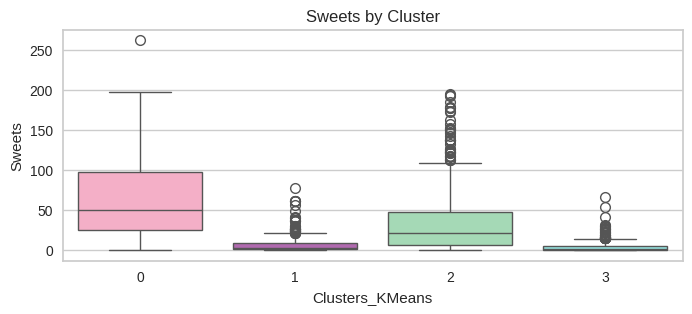

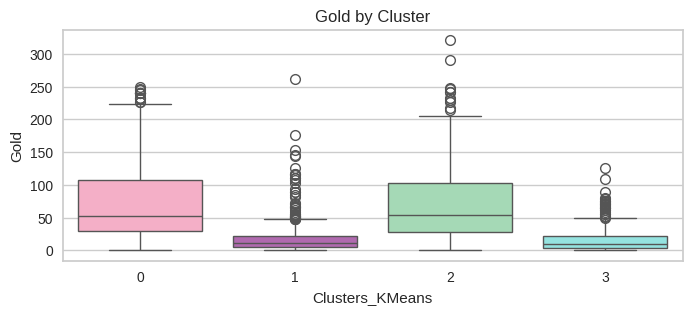

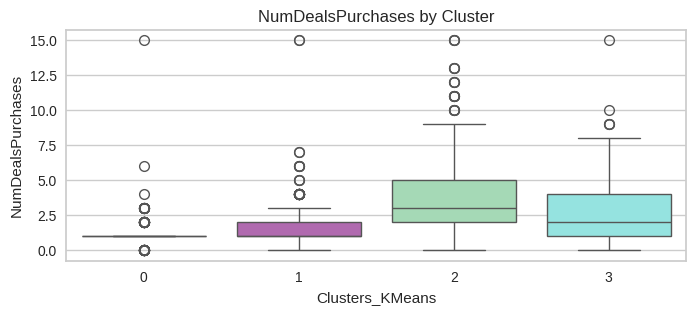

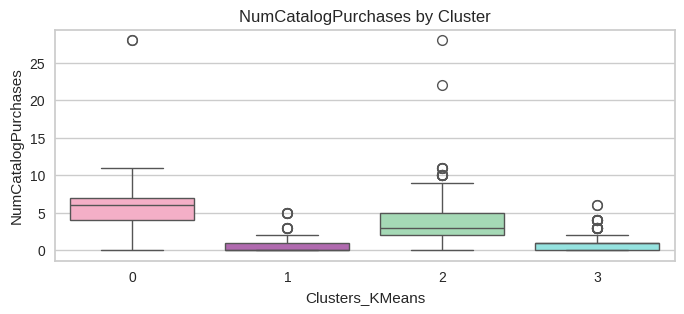

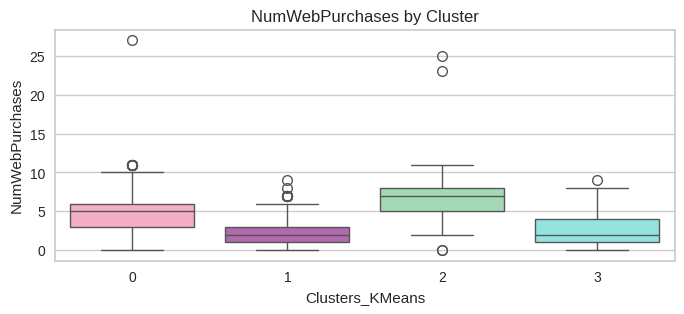

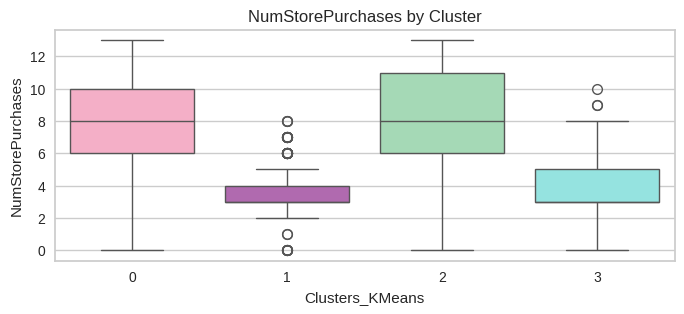

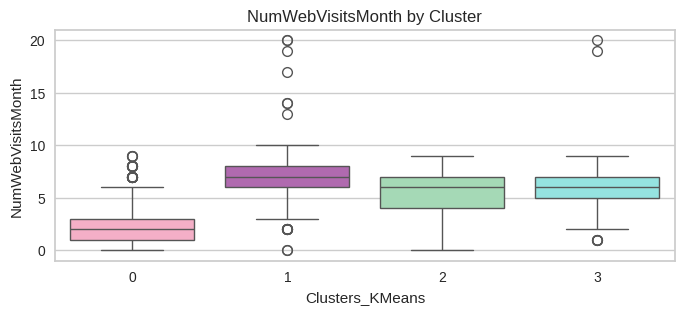

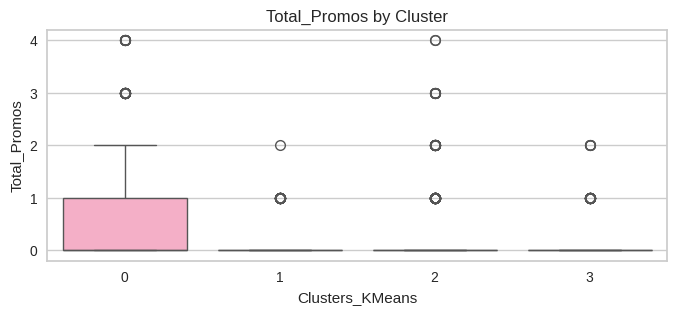

In [38]:
col_to_analyze = ['Fruits','Meat','Fish','Sweets','Gold','NumDealsPurchases','NumCatalogPurchases','NumWebPurchases',
                 'NumStorePurchases','NumWebVisitsMonth','Total_Promos']
for i in col_to_analyze:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x='Clusters_KMeans', y=i, data=data,palette=pastel_palette)
    plt.title(f'{i} by Cluster')
    plt.show()

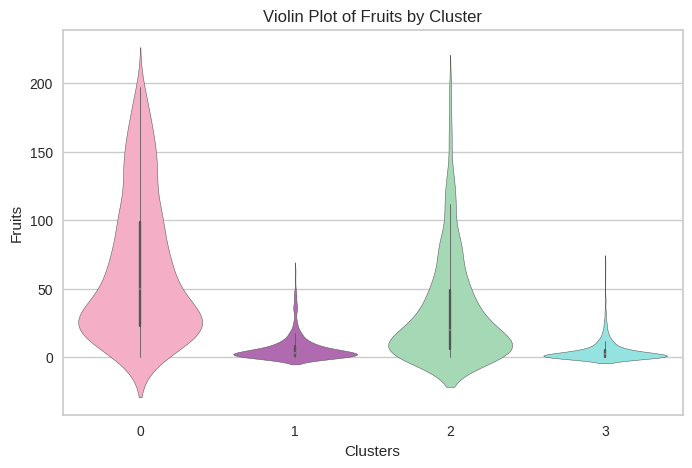

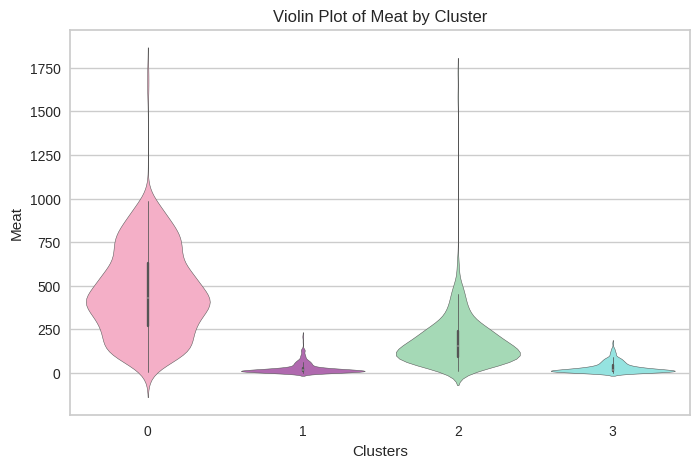

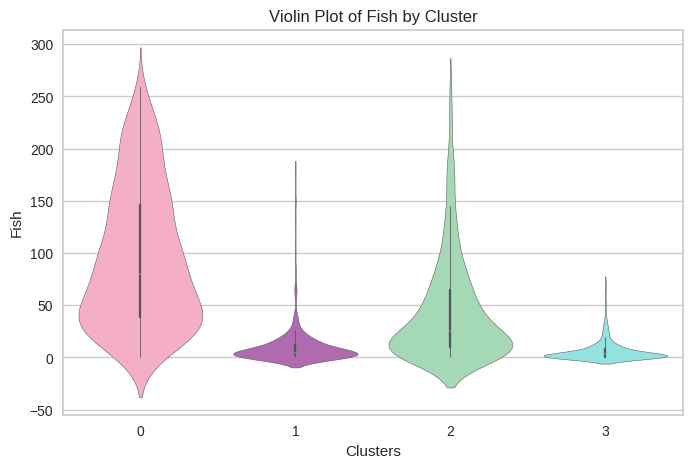

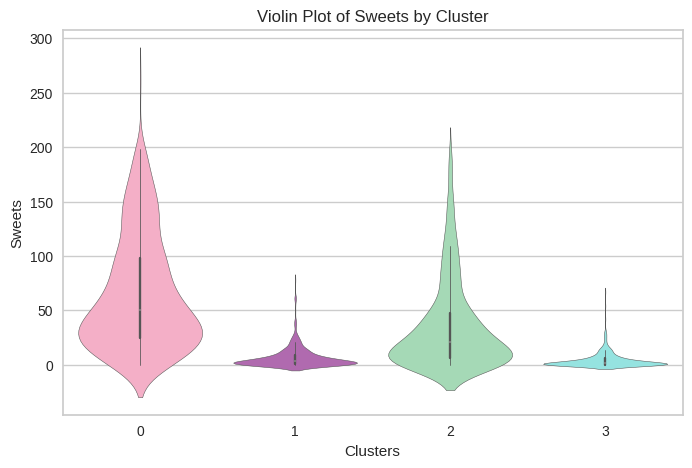

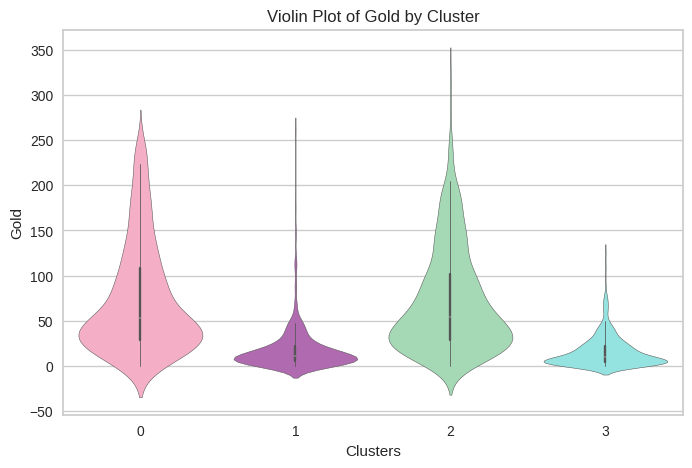

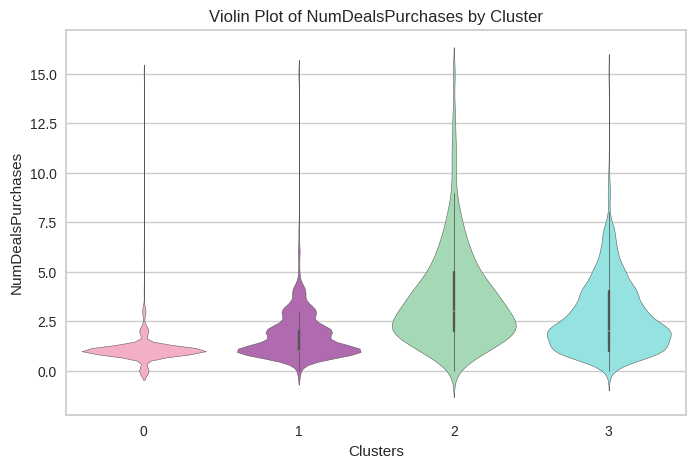

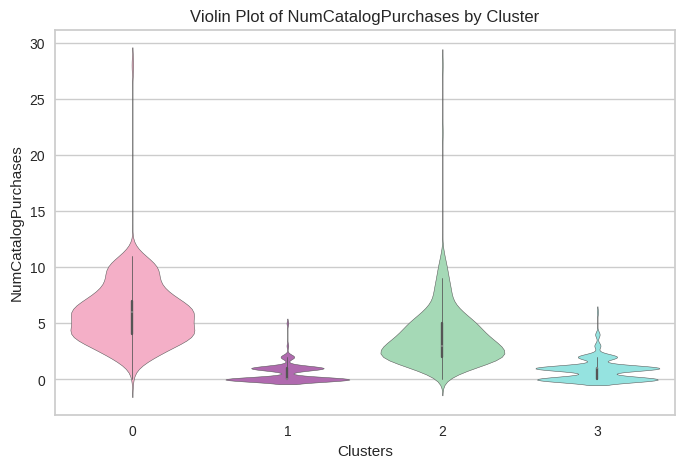

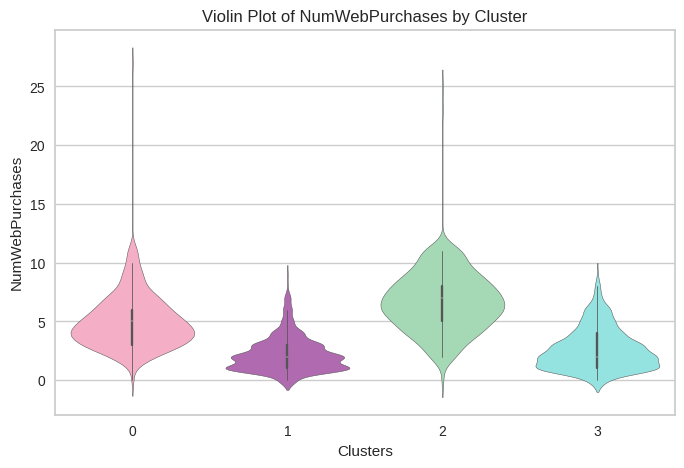

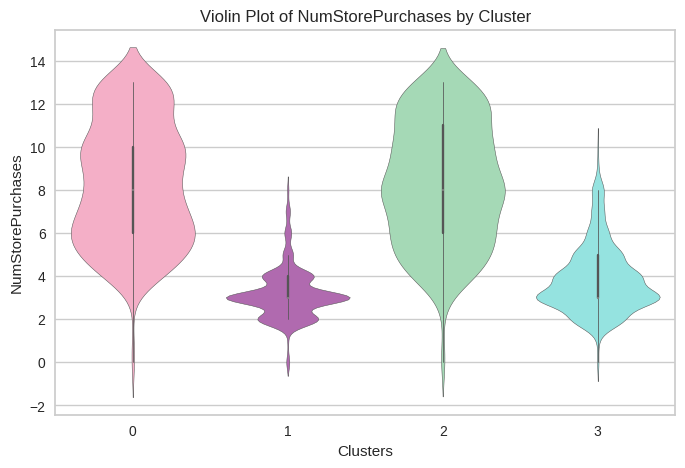

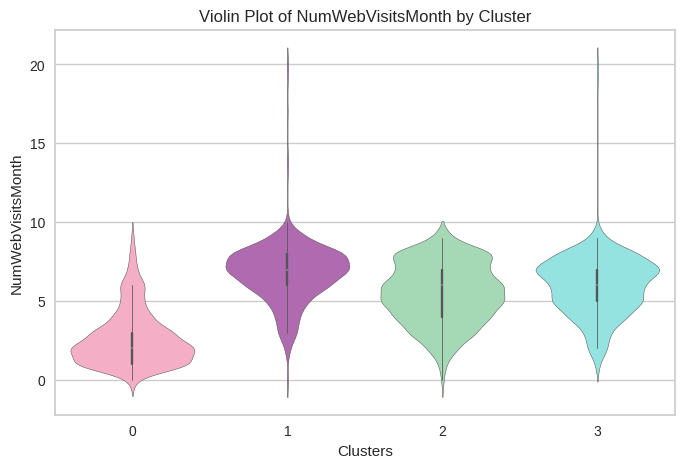

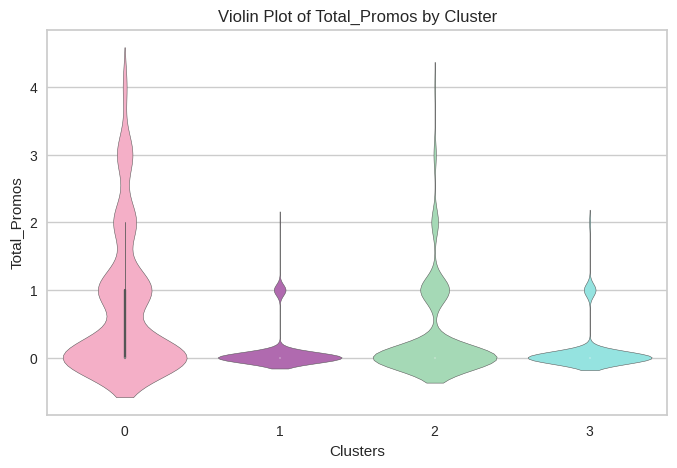

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variáveis a serem analisadas
col_to_analyze = ['Fruits','Meat','Fish','Sweets','Gold','NumDealsPurchases','NumCatalogPurchases',
                  'NumWebPurchases','NumStorePurchases','NumWebVisitsMonth','Total_Promos']

# Loop sobre cada variável
for i in col_to_analyze:
    plt.figure(figsize=(8, 5))  # Tamanho da figura
    sns.violinplot(x='Clusters_KMeans', y=i, data=data, palette=pastel_palette)  # Violin plot
    plt.title(f'Violin Plot of {i} by Cluster')  # Título do gráfico
    plt.xlabel('Clusters')  # Rótulo do eixo x
    plt.ylabel(i)  # Rótulo do eixo y
    plt.show()  # Exibir o gráfico


### Conclusion

Based on these information, significant conclusions will be made regarding customer behavior within each group.

Group 0 represents individuals who are not parents and typically have no children. Their family size ranges from 1 to 2 members, spanning an age range of 25 to 75 years. Despite their lack of dependents, they exhibit high income and high spending habits.

In contrast, Group 1 primarily comprises parents, with most having a maximum of one child who is not yet a teenager. Similar to Group 0, their family size ranges from 1 to 2 members, but their age range is narrower, typically between 25 and 50 years. They tend to have lower income levels and conservative spending habits.

Group 2 consists mainly of parents, with the majority having no more than one child or one teenager. Their family size is slightly larger, typically ranging from 2 to 4 members, and their age range extends from 40 to 70 years.

Lastly, Group 3 consists of individuals with an average income but high spending habits. They usually have more than one child, including teenagers or younger children, leading to larger family sizes ranging from 3 to 5 members. Their age range is similar to that of Group 2, typically between 45 and 75 years. Despite their higher spending tendencies, they tend to have lower income levels.




### The result was the identification of likely Person Types:

Group 0: Likely individuals without children, with high income and high spending habits, spanning a wide age range.

Group 1: Likely a mix of parents and individuals with lower income and conservative spending habits, mostly with one child and younger in age.

Group 2: Likely middle-aged to older parents with moderate income and high spending habits.

Group 3: Likely families with more than one child, with lower income and conservative spending habits, typically older in age.